## 1CA Machine Learning

### Student Name: 
### Emily Cristina Herbas Luizaga (2023100)
### Mijail Fausto Blanco Vargas (2023012)

### PROBLEM STATEMENT

#### In the following CA project, we want to know the prediction of positive Covid cases registered in the dataset in Europe ("WHO Region"). In this dataset, we have different continents, countries and variables about Covid cases that will help us determine the predictions we want to know. The dataset was taken from kaggle analyzing different countries collecting data from the beginning of January 2020 until July 2020. To knoe the prediction of positive Covid cases is primordial since we need to know an stimate of positive covid cases for knowing how is the pandemy spreding around the world and this information could be useful for the countries to know if they need more medical attention, to have hospitals available or possible treatments for the people infected.

In [1]:
# Importing libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets
df_cl = pd.read_csv('covid_19_clean_complete.csv')
df_world = pd.read_csv('worldometer_data.csv')

In [3]:
# Merging datasets
cov_df = df_cl.merge(df_world[["Country/Region", "Continent"]], on="Country/Region", how='left')
cov_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,Africa


We loaded the datasets and merged the columns needed for the analysis.

## Characterization of the Covid Dataset

In [4]:
#Analysing the columns dtype and NaN values
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
 10  Continent       38164 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ MB


We have 11 columns in the dataset in which 2 of them are continuous numerical variables, 4 are discrete numerical variables and 5 are categorical variables.

In [5]:
cov_df.shape

(49068, 11)

The shape of our dataset has 49068 rows and 11 columns and now let's proceed with Data cleaning before performing any Machine Learning modelling.

In [6]:
#Showing the insights of the numerical values
cov_df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In the dataset we can appreciate some details as latitude, and longitude which show us where is every country located, and a collection of confirmed, deaths, recovered, and active cases of Covid.

In [7]:
#Showing the insights of the categorical values
cov_df.describe(include='object')

,Province/State,Country/Region,Date,WHO Region,Continent
count,14664,49068,49068,49068,38164
unique,78,187,188,6,6
top,Australian Capital Territory,China,2020-01-22,Europe,Europe
freq,188,6204,261,15040,10528


In our categorical variables, we can see that we have 187 countries in our dataset

## Data Cleaning

In [8]:
# Dropping duplicates
cov_df.drop_duplicates()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,Asia
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,Asia


In [9]:
# Showing the shape of the dataframe after dropping duplicates
cov_df.shape

(49068, 11)

The number of rows didn't change after dropping duplicates, and this means that our data doesn't have duplicates inside and in the following code we are going to standarize the NaN values.

In [10]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--"]
cov_df = cov_df.replace(missing_val, pd.NA)

In [11]:
#Showing the percentage of NaN values in each column
NaN_per = (cov_df.isnull().sum()/len(cov_df))*100
NaN_per

Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
Continent         22.222222
dtype: float64

As we can see the variable "Province/state" has around 70% of Null values present, and we decided to drop it since it would create bias and variance leading into bad predictions in our Machine Learning predictions.

In the column continent, as it is related to "WHO Region", we are going to annalyze the columns to see how similar they are.

In [12]:
# Dropping "Province/State and showing the unique values of "Continent"
cov_df.drop('Province/State', axis=1, inplace=True)
cov_df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia/Oceania', nan], dtype=object)

In [13]:
#Showing the unique values of "WHO Region"
cov_df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In the column "WHO Region", we have similar unique values; however, they are not the same for exaplme in Eastern Mediterranean Regions could be included European and non/European countries, that is why we are going to replace the NAN- variables as "Unknown"; this decission won't affect when we are annalyzing Europe as "WHO region".

In [14]:
cov_df['Continent'].fillna('Unknown', inplace=True)

In [15]:
cov_df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,Asia
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,Asia


## Emily Graphics

## Time Series Analysis of Confirmed cases in Europe (WHO Region)

In [26]:
# Separating the columns to be analyzed for time series and resetting index
covid_ts = cov_df[cov_df['WHO Region'] == 'Europe'].reset_index()
covid_ts.drop('index', axis=1, inplace=True)
covid_ts

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe,Europe
1,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe,Europe
2,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe,Asia
3,Austria,47.5162,14.5501,2020-01-22,0,0,0,0,Europe,Europe
4,Azerbaijan,40.1431,47.5769,2020-01-22,0,0,0,0,Europe,Asia
...,...,...,...,...,...,...,...,...,...,...
15035,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe,Unknown
15036,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe,Unknown
15037,United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe,Unknown
15038,France,46.8852,-56.3159,2020-07-27,4,0,1,3,Europe,Europe


In this data frame we are analyzing just the Europe WHO Region and we have 15040 rows and 10 columns. 

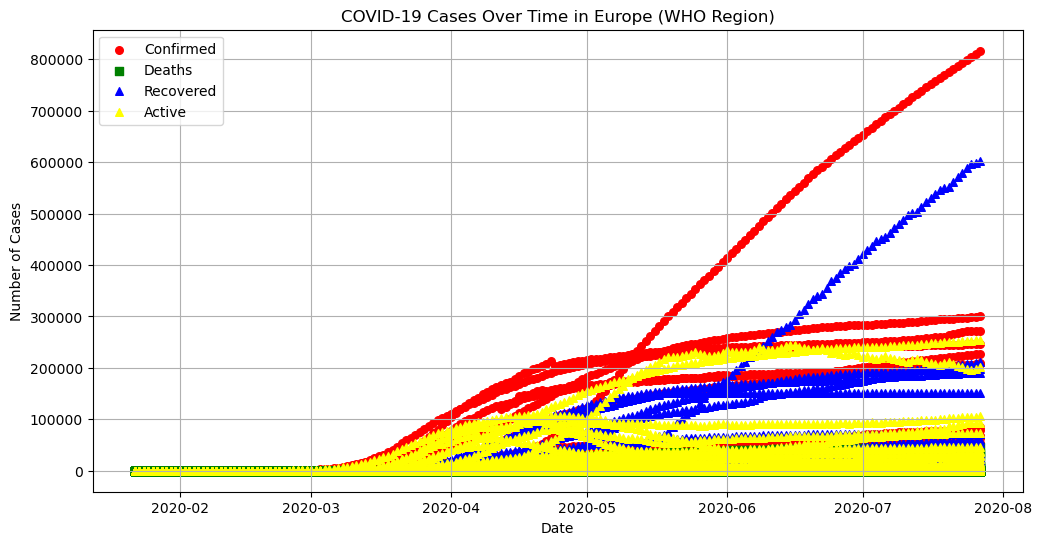

In [21]:
# Visualization of Covid-19 Cases Over Time in Europe
covid_EU = cov_df[cov_df['WHO Region'] == 'Europe']
covid_EU['Date'] = pd.to_datetime(covid_EU['Date'])

plt.figure(figsize=(12, 6))
plt.scatter(covid_EU['Date'], covid_EU['Confirmed'], label='Confirmed', color='red', marker='o', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Deaths'], label='Deaths', color='green', marker='s', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Recovered'], label='Recovered', color='blue', marker='^', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Active'], label='Active', color='yellow', marker='^', s=30)
plt.title('COVID-19 Cases Over Time in Europe (WHO Region)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()